# Fraud detection with Graph Attention Networks
# Project Part-01 & Part-02


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load data from the folder
df_classes = pd.read_csv("C:/Users/DELL/Downloads/ML/project/archive/elliptic_bitcoin_dataset/elliptic_txs_classes.csv")
df_edges = pd.read_csv("C:/Users/DELL/Downloads/ML/project/archive/elliptic_bitcoin_dataset/elliptic_txs_edgelist.csv")
df_features =  pd.read_csv("C:/Users/DELL/Downloads/ML/project/archive/elliptic_bitcoin_dataset/elliptic_txs_features.csv",header=None)

In [3]:
df_features.head()

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,230425980,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162097,...,-0.562153,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
2,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
3,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
4,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117


In [4]:
df_edges.head()

,txId1,txId2
0,230425980,5530458
1,232022460,232438397
2,230460314,230459870
3,230333930,230595899
4,232013274,232029206


In [5]:
df_classes.head()

,txId,class
0,230425980,unknown
1,5530458,unknown
2,232022460,unknown
3,232438397,2
4,230460314,unknown


In [6]:
df_classes['class'] = df_classes['class'].map({'unknown': 2, '1':1, '2':0})   #changing class labels

In [7]:
df_classes.head()

,txId,class
0,230425980,2
1,5530458,2
2,232022460,2
3,232438397,0
4,230460314,2


In [16]:
df_classes.tail()

,txId,class
203764,173077460,2
203765,158577750,2
203766,158375402,1
203767,158654197,2
203768,157597225,2


<BarContainer object of 3 artists>

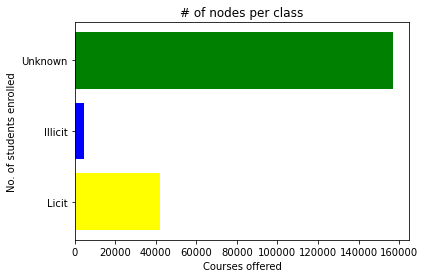

In [8]:
group_class = df_classes.groupby('class').count()
plt.title("# of nodes per class")
plt.xlabel("Courses offered")
plt.ylabel("No. of students enrolled")
plt.barh([ 'Licit','Illicit', 'Unknown'], group_class['txId'].values, color=['yellow', 'blue', 'green'] )

In [9]:
df_classes['class'].value_counts()

2    157205
0     42019
1      4545
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='txId'>

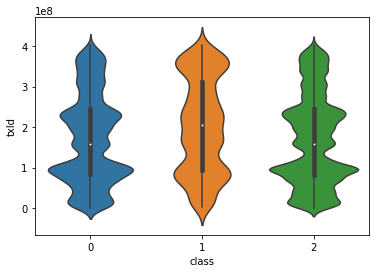

In [10]:
sns.violinplot(x="class", y="txId", data = df_classes) 

<AxesSubplot:xlabel='class', ylabel='count'>

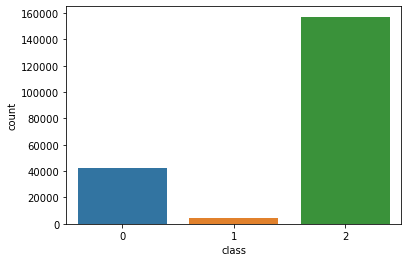

In [11]:
sns.countplot(data=df_classes, x='class')

<AxesSubplot:xlabel='txId1', ylabel='Count'>

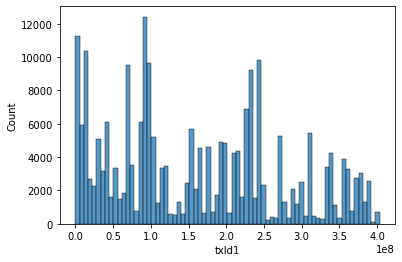

In [12]:
sns.histplot(data=df_edges, x='txId1')

<AxesSubplot:xlabel='txId2', ylabel='Count'>

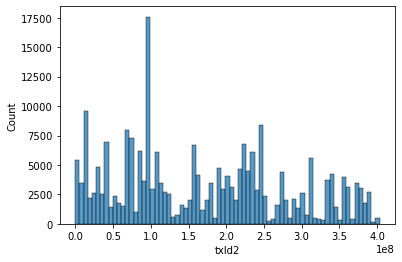

In [13]:
sns.histplot(data=df_edges, x='txId2')

In [14]:
df_edges.corr()

,txId1,txId2
txId1,1.000000,0.746848
txId2,0.746848,1.000000


<AxesSubplot:ylabel='Density'>

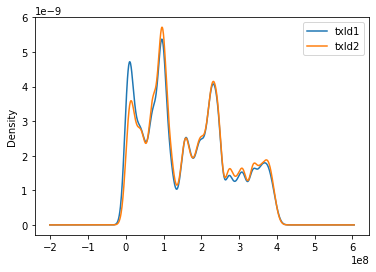

In [15]:
df_edges.plot(kind='density')